![](https://raw.githubusercontent.com/jobsrobson/repos-public/main/TSE/tse_banner_robson.png)

# Trabalho de Análise Exploratória

#### Dataset do Tribunal Superior Eleitoral (TSE) sobre os candidatos que participaram das Eleições Gerais de 2014 e 2018.

---
Curso:      Ciência de Dados e Inteligência Artificial

Disciplina: Introdução à Ciência de Dados

Professor:  Alexandre Vaz

Aluno:      Robson Ricardo Leite da Silva

RA:         2212120015

###### [Fonte dos dados](https://dadosabertos.tse.jus.br/)

---

In [ ]:
# Importação das bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go

Neste trabalho, serão utilizados dois datasets do Tribunal Superior Eleitoral: o primeiro sobre os candidatos que participaram das Eleições Gerais de 2018 e o segundo sobre os candidatos que participaram das Eleições Gerais de 2014.

--


## Candidatos de 2018

#### Criação do primeiro Data Frame e carregamento dos dados
###### Os dados abertos do TSE estão em formato .csv, com encoding em Latin1 e separados por ponto-e-vírgula. O arquivo .csv está localizado no GitHub.

In [ ]:
can = pd.read_csv('https://raw.githubusercontent.com/jobsrobson/repos-public/main/TSE/consulta_cand_2018_BRASIL.csv', sep=';', encoding='latin1', low_memory=False)

#### Ajustes iniciais

In [ ]:
# Drop de algumas colunas com dados irrelevantes para este projeto.

cand = can.drop(columns=['DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO',
       'CD_ELEICAO', 'DT_ELEICAO', 'SQ_CANDIDATO', 'SQ_COLIGACAO',
       'CD_CARGO',
       'NR_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND',
       'NR_PARTIDO', 'CD_NACIONALIDADE',
       'CD_MUNICIPIO_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'CD_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'CD_COR_RACA', 'CD_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'CD_SIT_TOT_TURNO',
       'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'CD_SITUACAO_CANDIDATO_PLEITO',
       'CD_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA'])

In [ ]:
# Para visualizar todas as colunas do data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [ ]:
# Mostra os cinco primeiros dados do novo dataframe
cand.head()

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
0,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,EUCLYDES DIAS BUCHLER,DR. EUCLYDES O MÉDICO DO POVO,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PR,PARTIDO DA REPÚBLICA,PARTIDO ISOLADO,PR,BRASILEIRA NATA,SP,PARAGUAÇU PAULISTA,23/04/1953,65.0,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,SUPLENTE,N,S,DEFERIDO,DEFERIDO
1,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,VERA LÚCIA RODRIGUES DE FARIA,VERA FARIA,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PARTIDO ISOLADO,PT,BRASILEIRA NATA,SP,LINS,03/12/1962,56.0,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PRETA,PROFESSOR DE ENSINO FUNDAMENTAL,SUPLENTE,N,S,DEFERIDO,INDEFERIDO COM RECURSO
2,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SC,SC,SANTA CATARINA,2º SUPLENTE,JOSE ROBERTO MARTINS,BETO MARTINS,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PR,PARTIDO DA REPÚBLICA,SANTA CATARINA QUER MAIS,MDB / AVANTE / PSDB / PTB / PTC / PRTB / DC / ...,BRASILEIRA NATA,SC,IMBITUBA,01/05/1970,48.0,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,ELEITO,N,S,DEFERIDO,DEFERIDO COM RECURSO
3,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AP,AP,AMAPÁ,DEPUTADO ESTADUAL,SANDRA MARIA DE MATOS CARDOSO,PROFESSORA SANDRA CARDOSO,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,SOLIDARIEDADE,SOLIDARIEDADE,UM NOVO TEMPO,SOLIDARIEDADE / PSD,BRASILEIRA NATA,AP,MACAPA,28/11/1958,60.0,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,PROFESSOR DE ENSINO FUNDAMENTAL,NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
4,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AM,AM,AMAZONAS,DEPUTADO ESTADUAL,SANJAY DE ABREU,SANJAY ABREU,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,PC do B,PARTIDO COMUNISTA DO BRASIL,O POVO FELIZ DE NOVO,PC do B / PT,BRASILEIRA NATA,AM,MANAUS,07/07/1982,36.0,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO


In [ ]:
# Visualiza os tipos de dados das colunas
cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29180 entries, 0 to 29179
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ANO_ELEICAO                   29180 non-null  int64  
 1   NM_TIPO_ELEICAO               29180 non-null  object 
 2   NR_TURNO                      29180 non-null  int64  
 3   DS_ELEICAO                    29180 non-null  object 
 4   TP_ABRANGENCIA                29180 non-null  object 
 5   SG_UF                         29180 non-null  object 
 6   SG_UE                         29180 non-null  object 
 7   NM_UE                         29180 non-null  object 
 8   DS_CARGO                      29180 non-null  object 
 9   NM_CANDIDATO                  29180 non-null  object 
 10  NM_URNA_CANDIDATO             29180 non-null  object 
 11  NM_SOCIAL_CANDIDATO           29180 non-null  object 
 12  DS_SITUACAO_CANDIDATURA       29180 non-null  object 
 13  D

In [ ]:
# Visualiza o tamanho do data frame
cand.shape

(29180, 34)

--
##### Remoção de um dado incorreto
A coluna 'DT_NASCIMENTO' traz um dado incorreto em relação a data de nascimento de um dos candidatos. Este erro impede a continuidade da análise dos dados, prejudicando a conversão das datas para o formato 'datetime'. Por isso, oda a linha deve ser removida.

In [ ]:
# Identificando o index da linha com erro
cand[cand.eq("26/12/1193").any(1)]

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
372,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,PA,PA,PARÁ,DEPUTADO ESTADUAL,MAURO CEZAR MELO RIBEIRO,MAURO RIBEIRO,#NULO#,INAPTO,INDEFERIDO,COLIGAÇÃO,PRB,PARTIDO REPUBLICANO BRASILEIRO,POR UM PARÁ MELHOR,PRB / PMB,BRASILEIRA NATA,PA,BELÉM,26/12/1193,825.0,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,OUTROS,#NULO#,N,N,#NULO#,#NULO#


In [ ]:
# Remoção da linha com base no nome do candidato.
erro = cand[(cand.NM_CANDIDATO == 'MAURO CEZAR MELO RIBEIRO')].index
cand.drop(erro, inplace=True)

In [ ]:
# Transformação da coluna 'DT_NASCIMENTO' de 'object' para 'datetime'
cand['DT_NASCIMENTO']=pd.to_datetime(cand['DT_NASCIMENTO'], format='%d/%m/%Y')

Remoção do '.0' no final dos valores da coluna 'NR_DATA_IDADE_POSSE' e transformação dos dados em tipo 'Integer'.

In [ ]:
# Os valores na coluna 'NR_IDADE_DATA_POSSE' estavam em formato 'float' e traziam um '.0' após cada valor.
# Para transformar esta coluna em 'integer', é preciso remover o '.0'. Para isso:
cand['NR_IDADE_DATA_POSSE'] = cand['NR_IDADE_DATA_POSSE'].apply(lambda f: format(f, '.0f'))

In [ ]:
# Drop de valores 'nan' na coluna 'IDADE' 
candidatos = cand[(cand['NR_IDADE_DATA_POSSE'] != 'nan')]

In [ ]:
# Verificação do comando anterior
candidatos['NR_IDADE_DATA_POSSE'].unique()

array(['65', '56', '48', '60', '36', '55', '49', '37', '54', '25', '46',
       '43', '39', '71', '47', '57', '40', '45', '31', '30', '34', '41',
       '53', '38', '64', '42', '33', '26', '44', '51', '62', '66', '58',
       '67', '23', '32', '50', '59', '27', '61', '76', '29', '35', '69',
       '24', '70', '21', '52', '28', '63', '68', '22', '73', '72', '83',
       '77', '81', '74', '75', '80', '20', '19', '84', '82', '78', '79',
       '94', '89', '88', '85', '90', '87', '86', '91', '18'], dtype=object)

In [ ]:
# Verificar quantos valores foram removidos (apenas 2)
candidatos.shape

(29178, 34)

In [ ]:
# Transformando o tipo de dado em 'integer'
candidatos['NR_IDADE_DATA_POSSE'] = candidatos['NR_IDADE_DATA_POSSE'].astype('int64')

C:\Users\jobsr\AppData\Local\Temp\ipykernel_4928\1066804322.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Verificação do comando anterior
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29178 entries, 0 to 29179
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ANO_ELEICAO                   29178 non-null  int64         
 1   NM_TIPO_ELEICAO               29178 non-null  object        
 2   NR_TURNO                      29178 non-null  int64         
 3   DS_ELEICAO                    29178 non-null  object        
 4   TP_ABRANGENCIA                29178 non-null  object        
 5   SG_UF                         29178 non-null  object        
 6   SG_UE                         29178 non-null  object        
 7   NM_UE                         29178 non-null  object        
 8   DS_CARGO                      29178 non-null  object        
 9   NM_CANDIDATO                  29178 non-null  object        
 10  NM_URNA_CANDIDATO             29178 non-null  object        
 11  NM_SOCIAL_CANDIDATO         

In [ ]:
# Verificação dos resultados das transformações acima
candidatos.head()

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
0,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,EUCLYDES DIAS BUCHLER,DR. EUCLYDES O MÉDICO DO POVO,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PR,PARTIDO DA REPÚBLICA,PARTIDO ISOLADO,PR,BRASILEIRA NATA,SP,PARAGUAÇU PAULISTA,1953-04-23,65,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,SUPLENTE,N,S,DEFERIDO,DEFERIDO
1,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,VERA LÚCIA RODRIGUES DE FARIA,VERA FARIA,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PARTIDO ISOLADO,PT,BRASILEIRA NATA,SP,LINS,1962-12-03,56,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PRETA,PROFESSOR DE ENSINO FUNDAMENTAL,SUPLENTE,N,S,DEFERIDO,INDEFERIDO COM RECURSO
2,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SC,SC,SANTA CATARINA,2º SUPLENTE,JOSE ROBERTO MARTINS,BETO MARTINS,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PR,PARTIDO DA REPÚBLICA,SANTA CATARINA QUER MAIS,MDB / AVANTE / PSDB / PTB / PTC / PRTB / DC / ...,BRASILEIRA NATA,SC,IMBITUBA,1970-05-01,48,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,ELEITO,N,S,DEFERIDO,DEFERIDO COM RECURSO
3,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AP,AP,AMAPÁ,DEPUTADO ESTADUAL,SANDRA MARIA DE MATOS CARDOSO,PROFESSORA SANDRA CARDOSO,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,SOLIDARIEDADE,SOLIDARIEDADE,UM NOVO TEMPO,SOLIDARIEDADE / PSD,BRASILEIRA NATA,AP,MACAPA,1958-11-28,60,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,PROFESSOR DE ENSINO FUNDAMENTAL,NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO
4,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AM,AM,AMAZONAS,DEPUTADO ESTADUAL,SANJAY DE ABREU,SANJAY ABREU,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,PC do B,PARTIDO COMUNISTA DO BRASIL,O POVO FELIZ DE NOVO,PC do B / PT,BRASILEIRA NATA,AM,MANAUS,1982-07-07,36,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO


---

## Candidatos de 2014

#### Criação do segundo Data Frame e carregamento dos dados
###### Os dados abertos do TSE estão em formato .csv, com encoding em Latin1 e separados por ponto-e-vírgula. O arquivo .csv está localizado no GitHub.

In [ ]:
candidatos2014 = pd.read_csv('https://raw.githubusercontent.com/jobsrobson/repos-public/main/TSE/consulta_cand_2014_BRASIL.csv', sep=';', encoding='latin1', on_bad_lines='skip', low_memory=False)

#### Ajustes Iniciais

In [ ]:
# Drop de algumas colunas com dados irrelevantes para este projeto.

candidatos14 = candidatos2014.drop(columns=['DT_GERACAO', 'HH_GERACAO', 'CD_TIPO_ELEICAO',
       'CD_ELEICAO', 'DT_ELEICAO', 'SQ_CANDIDATO', 'SQ_COLIGACAO',
       'CD_CARGO',
       'NR_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND',
       'NR_PARTIDO', 'CD_NACIONALIDADE',
       'CD_MUNICIPIO_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'CD_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'CD_COR_RACA', 'CD_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
       'CD_SIT_TOT_TURNO',
       'NR_PROTOCOLO_CANDIDATURA', 'NR_PROCESSO',
       'CD_SITUACAO_CANDIDATO_PLEITO',
       'CD_SITUACAO_CANDIDATO_URNA',
       'ST_CANDIDATO_INSERIDO_URNA'])

In [ ]:
# Drop da primeira linha do dataframe que apresentava erro.
cand14 = candidatos14.drop(index=0)

In [ ]:
# Os valores na coluna 'NR_IDADE_DATA_POSSE' estavam em formato 'float' e traziam um '.0' após cada valor.
# Para transformar esta coluna em 'integer', é preciso remover o '.0'. Para isso:
cand14['NR_IDADE_DATA_POSSE'] = cand14['NR_IDADE_DATA_POSSE'].apply(lambda f: format(f, '.0f'))

In [ ]:
# Drop de valores 'nan' na coluna 'IDADE' 
can14 = cand14[(cand14['NR_IDADE_DATA_POSSE'] != 'nan')]

In [ ]:
# Verificação do comando anterior
can14['NR_IDADE_DATA_POSSE'].unique()

array(['44', '59', '50', '62', '37', '51', '24', '32', '57', '26', '56',
       '41', '55', '35', '73', '38', '54', '77', '49', '53', '39', '46',
       '48', '58', '61', '69', '66', '52', '30', '45', '42', '29', '47',
       '31', '43', '33', '36', '34', '27', '40', '64', '28', '68', '63',
       '70', '67', '72', '60', '74', '22', '71', '65', '23', '19', '20',
       '75', '79', '86', '85', '25', '78', '80', '21', '76', '81', '82',
       '91', '84', '83', '89', '87', '92', '90', '18'], dtype=object)

In [ ]:
# Transformando o tipo de dado em 'integer'
can14['NR_IDADE_DATA_POSSE'] = can14['NR_IDADE_DATA_POSSE'].astype('int64')

C:\Users\jobsr\AppData\Local\Temp\ipykernel_4928\4003899518.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
can14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26259 entries, 1 to 26270
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ANO_ELEICAO                   26259 non-null  int64 
 1   NM_TIPO_ELEICAO               26259 non-null  object
 2   NR_TURNO                      26259 non-null  int64 
 3   DS_ELEICAO                    26259 non-null  object
 4   TP_ABRANGENCIA                26259 non-null  object
 5   SG_UF                         26259 non-null  object
 6   SG_UE                         26259 non-null  object
 7   NM_UE                         26259 non-null  object
 8   DS_CARGO                      26259 non-null  object
 9   NM_CANDIDATO                  26259 non-null  object
 10  NM_URNA_CANDIDATO             26259 non-null  object
 11  NM_SOCIAL_CANDIDATO           26259 non-null  object
 12  DS_SITUACAO_CANDIDATURA       26259 non-null  object
 13  DS_DETALHE_SITUA

In [ ]:
can14.head()

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
1,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,AC,AC,ACRE,DEPUTADO ESTADUAL,LUZIELE ALVES DIAS,LUZIELE,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PC do B,PARTIDO COMUNISTA DO BRASIL,FRENTE POPULAR DO ACRE VI,PC do B / PTB,BRASILEIRA NATA,AC,RIO BRANCO,06/05/1970,44,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,PROFESSOR DE ENSINO MÉDIO,SUPLENTE,N,S,DEFERIDO,DEFERIDO
2,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,RS,RS,RIO GRANDE DO SUL,DEPUTADO FEDERAL,LEUDO IRAJA SANTOS COSTA,LEUDO COSTA,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,UNIDOS PELA ESPERANÇA,PP / PRB / SD / PSDB,BRASILEIRA NATA,RS,SANTIAGO,19/10/1955,59,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ADVOGADO,SUPLENTE,N,S,DEFERIDO,DEFERIDO
3,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,GO,GO,GOIÁS,DEPUTADO ESTADUAL,ARNALDO LUIZ DA SILVA,ARNALDINHO,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,PARTIDO ISOLADO,PSOL,BRASILEIRA NATA,PE,SAO BEBEDITO DO SUL,31/07/1964,50,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,OUTROS,NÃO ELEITO,N,S,DEFERIDO,DEFERIDO
4,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,RJ,RJ,RIO DE JANEIRO,DEPUTADO ESTADUAL,JOSÉ JAILSON CRUZ,CAMARÃO,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PT do B,PARTIDO TRABALHISTA DO BRASIL,PARTIDO ISOLADO,PT do B,BRASILEIRA NATA,AL,PENEDO,28/08/1952,62,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),BRANCA,OUTROS,SUPLENTE,N,N,DEFERIDO,DEFERIDO
5,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,MG,MG,MINAS GERAIS,DEPUTADO ESTADUAL,MARCOS NICÁCIO GOMES,MARCOS DO IORGUTE,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,PARTIDO ISOLADO,PMN,BRASILEIRA NATA,MG,SÃO SEBASTIÃO DO SACRAMENTO,09/01/1978,37,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,DIVORCIADO(A),AMARELA,"VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIA...",SUPLENTE,N,S,DEFERIDO,DEFERIDO


---

## Análise dos Dados

### Análise dos Candidatos das Eleições de 2018

#### Quantidade de Candidatos

In [ ]:
# Contagem de candidatos por Unidade da Federação, incluindo os candidatos ao Executivo Federal (denominados 'BR').
candidatos['SG_UF'].value_counts()

SP    3952
RJ    3699
MG    2378
RS    1344
PR    1288
DF    1261
BA    1196
GO    1193
PE    1094
CE     913
PA     902
AM     859
ES     833
MA     796
SC     788
RR     687
AP     667
RO     658
PB     621
AC     586
MT     576
MS     545
SE     530
RN     516
AL     461
PI     439
TO     364
BR      32
Name: SG_UF, dtype: int64

Text(0.5, 0, '')

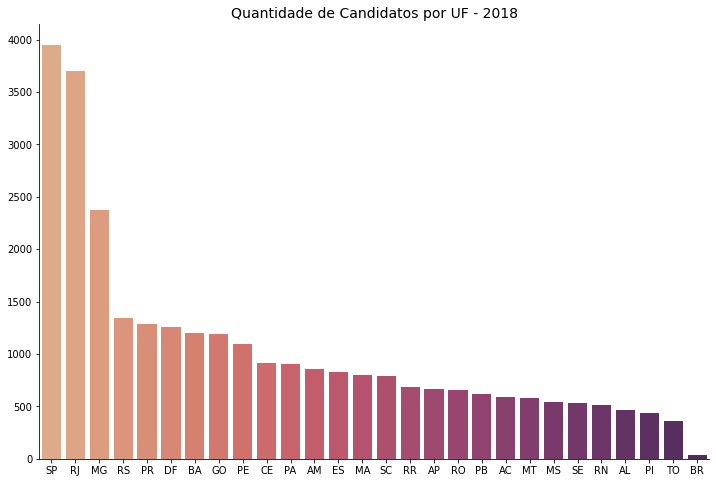

In [ ]:
# Gráfico da quantidade de candidatos por UF
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(left=False)
sns.countplot(x='SG_UF', order=candidatos['SG_UF'].value_counts().index, data=candidatos, palette='flare')
plt.title('Quantidade de Candidatos por UF - 2018',fontsize=14)
plt.ylabel('')
plt.xlabel('')

Com base nestes dados, pode-se concluir que o Estado com maior número de candidados é São Paulo (SP), seguido por Rio de Janeiro (RJ) e Minas Gerais (MG).

Segundo o IBGE:
Em 2018, o Brasil possuia uma estimativa de 208,5 milhões de habitantes, segundo o IBGE. Os três estados mais populosos do Brasil estão na Região Sudeste. São Paulo ocupa o topo do ranking, com 45,5 milhões de habitantes, o que equivale a 21,8% de toda a população do país. Ele é seguido por Minas Gerais, com 21 milhões, e Rio de Janeiro, com 17,2 milhões. 

Outros três estados completam o grupo com mais de 10 milhões de habitantes: Bahia, com 14,8 milhões, Paraná, com 11,3 milhões, e Rio Grande do Sul, com também com 11,3 milhões. Já Roraima, na Região Norte, é o estado menos populoso, com 576,6 mil habitantes (0,3% da população total). Os outros dois menores estados também estão na Região Norte: Amapá, com 829 mil, e Acre, com 869 mil. Estes três estados nortistas são os únicos com menos de 1 milhão de habitantes.

Desta forma, os três Estados mais populosos possuem o maior número de candidatos.

[Fonte](https://g1.globo.com/economia/noticia/2018/08/29/brasil-tem-mais-de-208-milhoes-de-habitantes-segundo-o-ibge.ghtml)

--
#### Candidatos por Sexo

In [ ]:
# Contagem de candidatos por Sexo
candidatos['DS_GENERO'].value_counts()

MASCULINO    19957
FEMININO      9221
Name: DS_GENERO, dtype: int64

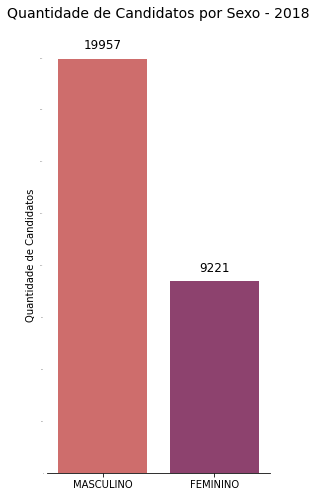

In [ ]:
# Gráfico da distribuição de candidatos por sexo em todas as UF.
fig, ax = plt.subplots(figsize=(4,8))
splot = sns.countplot(data=candidatos, x='DS_GENERO', order=candidatos['DS_GENERO'].value_counts().index, palette='flare')
plt.title('Quantidade de Candidatos por Sexo - 2018',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    Nota-se uma grande diferença na distribuição de candidatos por sexo nas Eleições Gerais de 2018.
    Menos da metade do total de candidatos é do sexo Feminino (31.60%).

--
#### Candidatos por Idade

In [ ]:
# Média de idade dos Candidatos em 2018
candidatos['NR_IDADE_DATA_POSSE'].mean()

47.709335800945915

Text(0.5, 6.800000000000011, 'Idade (na data da posse)')

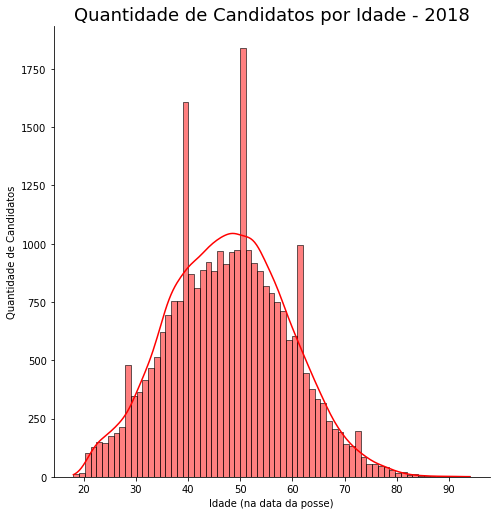

In [ ]:
#  Geração do gráfico de idade
sns.displot(data=candidatos, x='NR_IDADE_DATA_POSSE', kde=True, height=7, color='red')

plt.title('Quantidade de Candidatos por Idade - 2018',fontsize=18)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('Idade (na data da posse)')

    Percebe-se que a maioria dos candidatos está na faixa etária entre 35 a 60 anos.

--
#### Candidatos por Cor/Raça

In [ ]:
# Contagem de candidatos por Cor/Raça
candidatos['DS_COR_RACA'].value_counts()

BRANCA      15306
PARDA       10406
PRETA        3163
AMARELA       169
INDÍGENA      134
Name: DS_COR_RACA, dtype: int64

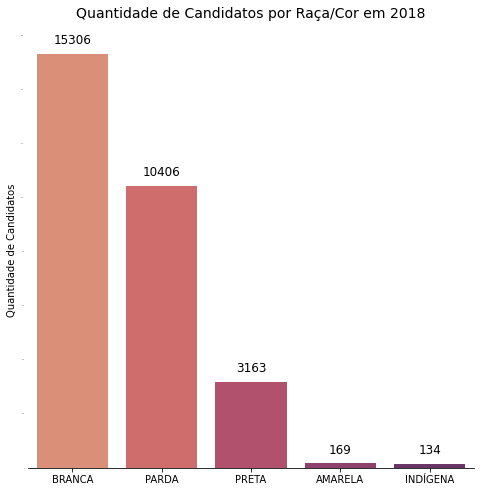

In [ ]:
# Geração do gráfico de candidatos por Cor/Raça
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='DS_COR_RACA', order=candidatos['DS_COR_RACA'].value_counts().index, data=candidatos, palette='flare')
plt.title('Quantidade de Candidatos por Raça/Cor em 2018',fontsize=14, pad=15)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    Pode-se determinar que a maioria dos candidatos se declara de cor/raça Branca (52.45%), seguido por Parda (35.66%) e Preta (10.84%).

--
#### Candidatos por Grau de Escolaridade

In [ ]:
# Contagem de candidatos por Grau de Escolaridade em 2018
candidatos['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO                14254
ENSINO MÉDIO COMPLETO             8555
SUPERIOR INCOMPLETO               2633
ENSINO FUNDAMENTAL COMPLETO       1691
ENSINO FUNDAMENTAL INCOMPLETO      920
ENSINO MÉDIO INCOMPLETO            832
LÊ E ESCREVE                       293
Name: DS_GRAU_INSTRUCAO, dtype: int64

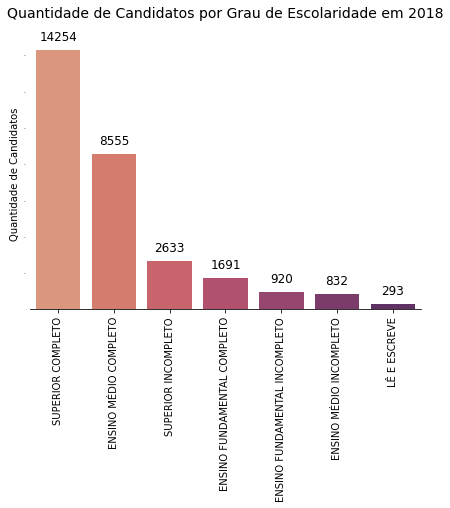

In [ ]:
# Geração do gráfico de candidatos por Grau de Escolaridade
fig, ax = plt.subplots(figsize=(7,5))
splot = sns.countplot(x='DS_GRAU_INSTRUCAO', order=candidatos['DS_GRAU_INSTRUCAO'].value_counts().index, data=candidatos, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Grau de Escolaridade em 2018',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    48.85% dos candidatos possuem Ensino Superior Completo, enquanto apenas 1.004% não completaram nenhum ciclo educacional, mas sabem ler e escrever.

--
#### Candidatos por Estado Civil

In [ ]:
# Contagem de candidatos por Estado Civil em 2018
candidatos['DS_ESTADO_CIVIL'].value_counts()

CASADO(A)                    15899
SOLTEIRO(A)                   9209
DIVORCIADO(A)                 3245
VIÚVO(A)                       494
SEPARADO(A) JUDICIALMENTE      331
Name: DS_ESTADO_CIVIL, dtype: int64

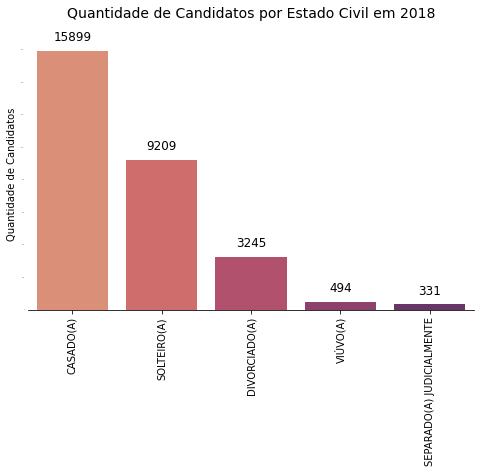

In [ ]:
# Geração do gráfico de candidatos por estado civil
fig, ax = plt.subplots(figsize=(8,5))
splot = sns.countplot(x='DS_ESTADO_CIVIL', order=candidatos['DS_ESTADO_CIVIL'].value_counts().index, data=candidatos, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Estado Civil em 2018',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    54.48% dos candidatos são casados, enquanto 31.56% são solteiros, 11.12% são divorciados, 1.69% são viúvos e 1.13% são separados.

--

#### Candidatos por Ocupação

In [ ]:
# Contagem de candidatos por Ocupação em 2018
candidatos['DS_OCUPACAO'].value_counts().unique

<bound method Series.unique of OUTROS                                         5690
EMPRESÁRIO                                     3026
ADVOGADO                                       1834
DEPUTADO                                       1129
COMERCIANTE                                    1019
                                               ... 
PROTÉTICO                                         1
FIANDEIRO, TECELÃO, TINGIDOR E ASSEMELHADOS       1
GOVERNANTA                                        1
CERAMISTA E OLEIRO                                1
ENGRAXATE                                         1
Name: DS_OCUPACAO, Length: 214, dtype: int64>

    A maioria dos candidados se encaixa na categoria Outros, seguido de Empresários, Advogados e, surpreendentemente, Deputados buscando reeleição.

--
#### Candidatos por Cargo Político

In [ ]:
# Contagem de candidatos por Cargo Político desejado
candidatos['DS_CARGO'].value_counts()

DEPUTADO ESTADUAL     17940
DEPUTADO FEDERAL       8588
DEPUTADO DISTRITAL      981
2º SUPLENTE             405
1º SUPLENTE             398
SENADOR                 368
VICE-GOVERNADOR         236
GOVERNADOR              230
PRESIDENTE               16
VICE-PRESIDENTE          16
Name: DS_CARGO, dtype: int64

C:\Users\jobsr\AppData\Local\Temp\ipykernel_4928\2788223577.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



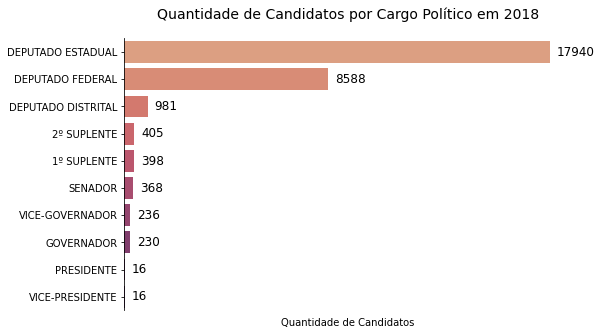

In [ ]:
# Geração do gráfico de candidatos por cargo político
fig, ax = plt.subplots(figsize=(8,5))
splot = sns.countplot(y='DS_CARGO', order=candidatos['DS_CARGO'].value_counts().index, data=candidatos, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Cargo Político em 2018',fontsize=14, pad=20)
plt.xlabel('Quantidade de Candidatos',)
plt.ylabel('')

sns.despine(bottom=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='x', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    O cargo mais concorrido é o de Deputado Estadual (por possuir mais vagas), seguido pelo cargo de Deputado Federal (513 vagas).

--
#### Candidatos por Partido

In [ ]:
# Quantidade de Partidos Políticos disputando as Eleições de 2018
len(pd.unique(candidatos['SG_PARTIDO']))

37

In [ ]:
# Quantidade de candidatos filiados aos partidos políticos.
candidatos['SG_PARTIDO'].value_counts()

PSL              1551
PSOL             1350
PT               1313
PATRIOTA         1237
MDB              1130
PROS             1096
AVANTE           1050
PRTB             1019
PHS               998
PRP               968
PDT               961
PSDB              961
PSB               956
PODE              938
PV                908
PSC               871
PRB               857
REDE              856
PTC               852
PC do B           823
DC                795
SOLIDARIEDADE     788
PMN               771
PP                761
PR                723
PSD               702
DEM               699
PPS               675
PTB               650
PPL               598
PMB               459
NOVO              419
PSTU              212
PCO               132
PCB                97
PL                  1
CIDADANIA           1
Name: SG_PARTIDO, dtype: int64

Text(0.5, 0, '')

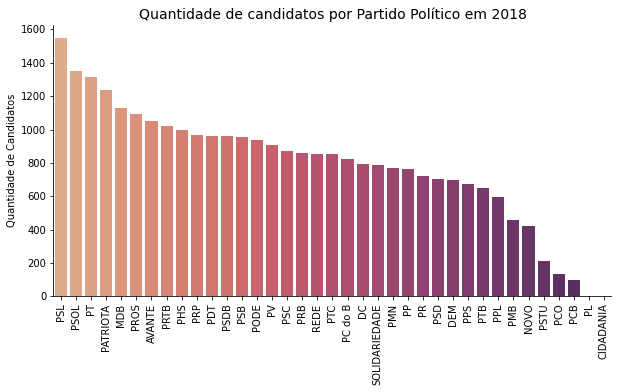

In [ ]:
# Geração do gráfico de candidatos por partido político em 2018
fig, ax = plt.subplots(figsize=(10,5))
splot = sns.countplot(x='SG_PARTIDO', order=candidatos['SG_PARTIDO'].value_counts().index, data=candidatos, palette='flare')

sns.despine(left=False) # retirada da moldura
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de candidatos por Partido Político em 2018',fontsize=14)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

    Percebe-se o grande volume de candidatos filiados ao partido de direita-radical PSL, mesmo partido do candidato à Presidência favorito nas pesquisas na época (Jair Bolsonaro).
    
    Estranhamente, os dados apresentam apenas um candidato filiado ao partido 'PL' e um candidato filiado ao partido 'CIDADANIA'.

---

### Análise dos Candidatos das Eleições de 2014

#### Quantidade de Candidatos

In [ ]:
### Quantidade total de candidatos
can14.shape

(26259, 34)

In [ ]:
# Apresenta a quantidade de candidatos por Estado da Federação, incluindo os candidatos ao Executivo Federal (denominados 'BR').
can14['SG_UF'].value_counts()

SP    3664
RJ    3162
MG    1943
PR    1236
DF    1205
BA    1093
RS    1092
GO    1064
PA    1050
MA     895
CE     879
ES     792
AM     786
PE     756
SC     676
AC     621
MS     601
PB     587
RO     571
AP     550
RR     541
MT     485
AL     479
RN     406
PI     403
TO     395
SE     303
BR      24
Name: SG_UF, dtype: int64

Text(0.5, 0, '')

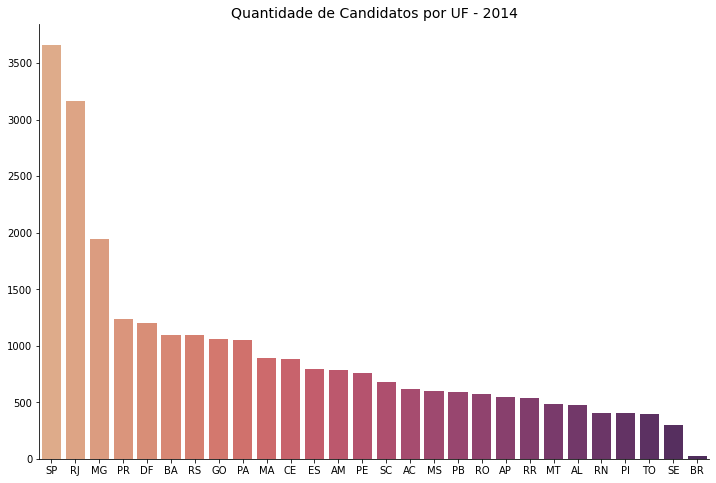

In [ ]:
# Gráfico da quantidade de candidatos por UF
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(left=False)
sns.countplot(x='SG_UF', order=can14['SG_UF'].value_counts().index, data=can14, palette='flare')
plt.title('Quantidade de Candidatos por UF - 2014',fontsize=14)
plt.ylabel('')
plt.xlabel('')

    Com base nestes dados, pode-se concluir que o Estado com maior número de candidados é São Paulo (SP), seguido por Rio de Janeiro (RJ) e Minas Gerais (MG), assim como na Eleição de 2018.

--
#### Candidatos por Sexo

In [ ]:
# Contagem de candidatos por sexo
can14['DS_GENERO'].value_counts()

MASCULINO    18122
FEMININO      8137
Name: DS_GENERO, dtype: int64

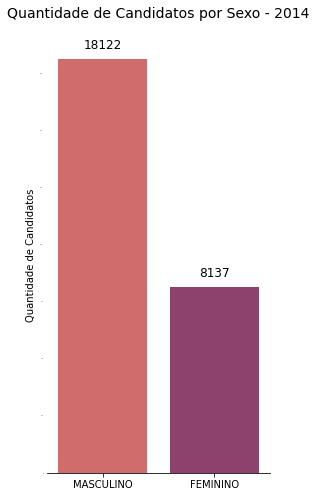

In [ ]:
# Gráfico da distribuição de candidatos por sexo em todas as UF.
fig, ax = plt.subplots(figsize=(4,8))
splot = sns.countplot(data=can14, x='DS_GENERO', order=can14['DS_GENERO'].value_counts().index, palette='flare')
plt.title('Quantidade de Candidatos por Sexo - 2014',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

--
#### Candidatos por Idade

In [ ]:
# Média de idade dos Candidatos de 2014
can14['NR_IDADE_DATA_POSSE'].mean()

47.16870406336875

Text(0.5, 6.800000000000011, 'Idade (na data da posse)')

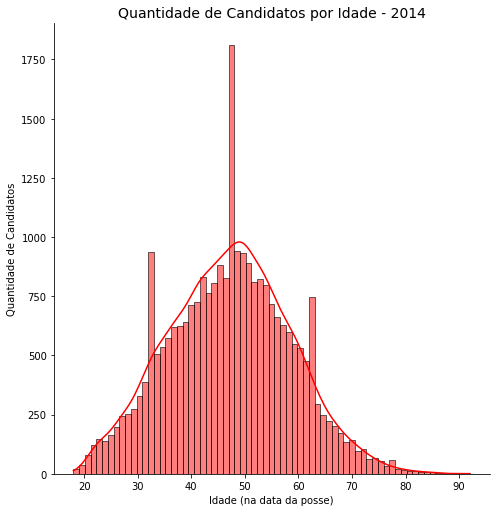

In [ ]:
#  Geração do gráfico de Idade
sns.displot(data=can14, x='NR_IDADE_DATA_POSSE', kde=True, height=7, color='red')

plt.title('Quantidade de Candidatos por Idade - 2014',fontsize=14)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('Idade (na data da posse)')

--
#### Candidatos por Cor/Raça

In [ ]:
# Contagem de candidados por Cor/Raça - 2014
can14['DS_COR_RACA'].value_counts()

BRANCA      14437
PARDA        9194
PRETA        2423
AMARELA       120
INDÍGENA       85
Name: DS_COR_RACA, dtype: int64

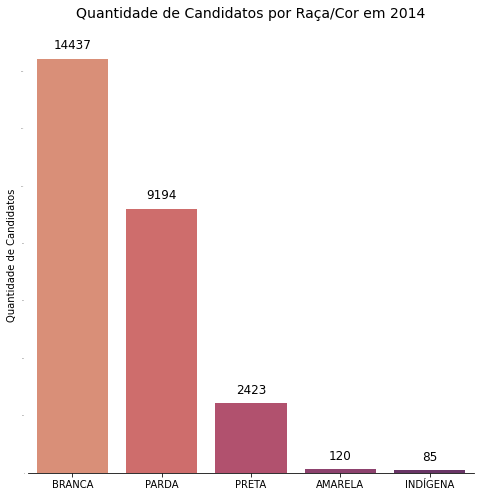

In [ ]:
# Geração do gráfico de candidatos por Cor/Raça
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='DS_COR_RACA', order=can14['DS_COR_RACA'].value_counts().index, data=can14, palette='flare')
plt.title('Quantidade de Candidatos por Raça/Cor em 2014',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

--
#### Candidatos por Grau de Escolaridade

In [ ]:
# Contagem de candidatos por grau de escolaridade - 2014
can14['DS_GRAU_INSTRUCAO'].value_counts()

SUPERIOR COMPLETO                11926
ENSINO MÉDIO COMPLETO             7871
SUPERIOR INCOMPLETO               2573
ENSINO FUNDAMENTAL COMPLETO       1903
ENSINO FUNDAMENTAL INCOMPLETO      886
ENSINO MÉDIO INCOMPLETO            838
LÊ E ESCREVE                       262
Name: DS_GRAU_INSTRUCAO, dtype: int64

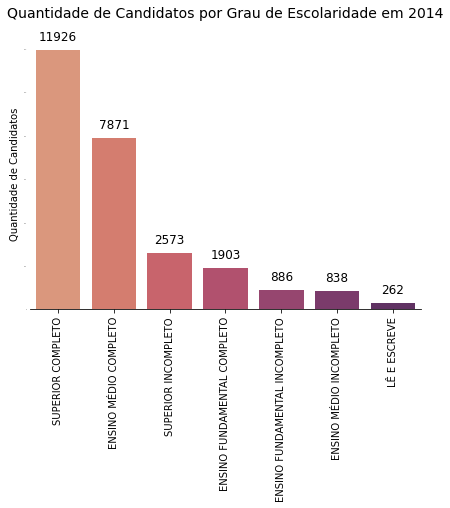

In [ ]:
# Geração do gráfico de candidatos por Grau de Escolaridade
fig, ax = plt.subplots(figsize=(7,5))
splot = sns.countplot(x='DS_GRAU_INSTRUCAO', order=can14['DS_GRAU_INSTRUCAO'].value_counts().index, data=can14, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Grau de Escolaridade em 2014',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    45.41% dos candidatos possuem Ensino Superior Completo, enquanto apenas 0.99% não possui nenhum ciclo educacional completo.

--
#### Candidatos por Estado Civil

In [ ]:
# Contagem de candidatos por estado civil
can14['DS_ESTADO_CIVIL'].value_counts()

CASADO(A)                    14574
SOLTEIRO(A)                   8013
DIVORCIADO(A)                 2724
VIÚVO(A)                       497
SEPARADO(A) JUDICIALMENTE      451
Name: DS_ESTADO_CIVIL, dtype: int64

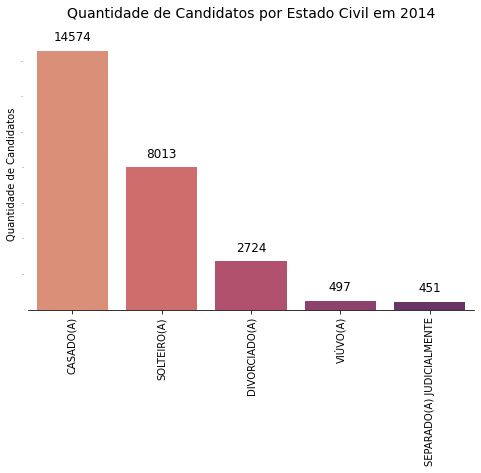

In [ ]:
# Geração do gráfico de candidatos por estado civil
fig, ax = plt.subplots(figsize=(8,5))
splot = sns.countplot(x='DS_ESTADO_CIVIL', order=can14['DS_ESTADO_CIVIL'].value_counts().index, data=can14, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Estado Civil em 2014',fontsize=14, pad=20)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

--
#### Candidatos por Ocupação

In [ ]:
# Contagem de candidatos por ocupação
can14['DS_OCUPACAO'].value_counts().unique

<bound method Series.unique of OUTROS                                                                    4346
EMPRESÁRIO                                                                2467
ADVOGADO                                                                  1450
DEPUTADO                                                                  1090
VEREADOR                                                                  1080
                                                                          ... 
OPERADOR DE IMPLEMENTO DE AGRICULTURA, PECUÁRIA E EXPLORAÇÃO FLORESTAL       1
FIANDEIRO, TECELÃO, TINGIDOR E ASSEMELHADOS                                  1
RELOJOEIRO E MONTADOR DE INSTRUMENTO DE PRECISÃO                             1
BOMBEIRO E INSTALADOR DE GÁS, ÁGUA, ESGOTO E ASSEMELHADOS                    1
ESTATÍSTICO                                                                  1
Name: DS_OCUPACAO, Length: 215, dtype: int64>

--
#### Candidatos por Cargo Político

In [ ]:
# Contagem de candidatos por cargo político desejado
can14['DS_CARGO'].value_counts()

DEPUTADO ESTADUAL     17004
DEPUTADO FEDERAL       7136
DEPUTADO DISTRITAL     1027
VICE-GOVERNADOR         236
GOVERNADOR              224
2º SUPLENTE             214
1º SUPLENTE             209
SENADOR                 185
VICE-PRESIDENTE          12
PRESIDENTE               12
Name: DS_CARGO, dtype: int64

C:\Users\jobsr\AppData\Local\Temp\ipykernel_4928\3550496471.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



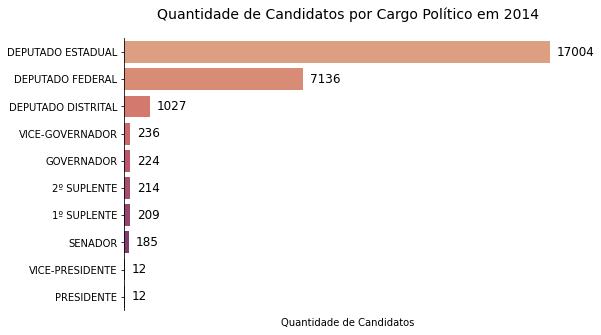

In [ ]:
# Geração do gráfico de candidatos por cargo político
fig, ax = plt.subplots(figsize=(8,5))
splot = sns.countplot(y='DS_CARGO', order=can14['DS_CARGO'].value_counts().index, data=can14, palette='flare')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de Candidatos por Cargo Político em 2014',fontsize=14, pad=20)
plt.xlabel('Quantidade de Candidatos',)
plt.ylabel('')

sns.despine(bottom=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='x', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

--
#### Candidatos por Partido Político

In [ ]:
# Quantidade de Partidos Políticos disputando as Eleições de 2014
len(pd.unique(can14['SG_PARTIDO']))

34

In [ ]:
# Contagem de candidatos filiados aos partidos políticos.
can14['SG_PARTIDO'].value_counts()

PT          1374
PSB         1360
PMDB        1324
PSOL        1258
PV          1135
PSDB        1129
PDT         1063
PHS         1028
PATRIOTA    1012
PSC          991
PRP          990
PTB          955
PTC          854
PC do B      852
PR           833
PSL          832
PT do B      822
PP           814
PSDC         801
PRTB         766
PRB          763
PSD          708
DEM          670
PTN          662
PPS          648
PMN          570
SD           556
PROS         489
PPL          468
PSTU         310
PCB          168
PCO           49
REDE           3
PODE           2
Name: SG_PARTIDO, dtype: int64

Text(0.5, 0, '')

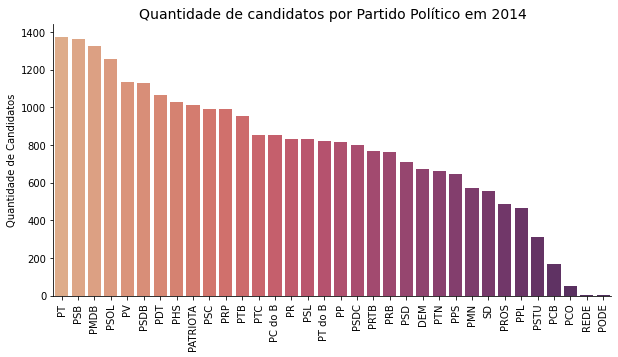

In [ ]:
# Geração do gráfico de candidatos por partido político em 2014
fig, ax = plt.subplots(figsize=(10,5))
splot = sns.countplot(x='SG_PARTIDO', order=can14['SG_PARTIDO'].value_counts().index, data=can14, palette='flare')

sns.despine(left=False) # retirada da moldura
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90) # rotação da legenda no eixo X
plt.title('Quantidade de candidatos por Partido Político em 2014',fontsize=14)
plt.ylabel('Quantidade de Candidatos',)
plt.xlabel('')

    Percebe-se o grande volume de candidatos filiados ao partido de centro-esquerda PT, mesmo partido da candidata à Presidência favorita nas pesquisas na época (Dilma Rousseff). Percebe-se também o grande volume de candidados filiados a partidos de esquerda, como PSB e PSOL.

---

## Comparação entre os pleitos de 2014 e 2018

In [ ]:
# Cria um terceiro data frame unindo os dois data frames, de 2014 e 2018.
dfComparado = pd.concat([candidatos, can14], axis=0, ignore_index=False)
dfComparado['col'] = (len(candidatos)*(0,) + len(can14)*(1,))
dfComparado.reset_index(inplace=True)

In [ ]:
# Mostra o resultado do terceiro data frame 'dfComparado'.
dfComparado

,index,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA,col
0,0,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,EUCLYDES DIAS BUCHLER,DR. EUCLYDES O MÉDICO DO POVO,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PR,PARTIDO DA REPÚBLICA,PARTIDO ISOLADO,PR,BRASILEIRA NATA,SP,PARAGUAÇU PAULISTA,1953-04-23 00:00:00,65,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MÉDICO,SUPLENTE,N,S,DEFERIDO,DEFERIDO,0
1,1,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SP,SP,SÃO PAULO,DEPUTADO ESTADUAL,VERA LÚCIA RODRIGUES DE FARIA,VERA FARIA,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PARTIDO ISOLADO,PT,BRASILEIRA NATA,SP,LINS,1962-12-03 00:00:00,56,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PRETA,PROFESSOR DE ENSINO FUNDAMENTAL,SUPLENTE,N,S,DEFERIDO,INDEFERIDO COM RECURSO,0
2,2,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,SC,SC,SANTA CATARINA,2º SUPLENTE,JOSE ROBERTO MARTINS,BETO MARTINS,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PR,PARTIDO DA REPÚBLICA,SANTA CATARINA QUER MAIS,MDB / AVANTE / PSDB / PTB / PTC / PRTB / DC / ...,BRASILEIRA NATA,SC,IMBITUBA,1970-05-01 00:00:00,48,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,ELEITO,N,S,DEFERIDO,DEFERIDO COM RECURSO,0
3,3,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AP,AP,AMAPÁ,DEPUTADO ESTADUAL,SANDRA MARIA DE MATOS CARDOSO,PROFESSORA SANDRA CARDOSO,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,SOLIDARIEDADE,SOLIDARIEDADE,UM NOVO TEMPO,SOLIDARIEDADE / PSD,BRASILEIRA NATA,AP,MACAPA,1958-11-28 00:00:00,60,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),PARDA,PROFESSOR DE ENSINO FUNDAMENTAL,NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO,0
4,4,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,AM,AM,AMAZONAS,DEPUTADO ESTADUAL,SANJAY DE ABREU,SANJAY ABREU,#NULO#,APTO,INDEFERIDO COM RECURSO,COLIGAÇÃO,PC do B,PARTIDO COMUNISTA DO BRASIL,O POVO FELIZ DE NOVO,PC do B / PT,BRASILEIRA NATA,AM,MANAUS,1982-07-07 00:00:00,36,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",NÃO ELEITO,N,N,INDEFERIDO COM RECURSO,INDEFERIDO COM RECURSO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55432,26266,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,DF,DF,DISTRITO FEDERAL,DEPUTADO DISTRITAL,OSMAR DA SILVA FELICIO,OSMAR,#NULO#,APTO,DEFERIDO,COLIGAÇÃO,PR,PARTIDO DA REPÚBLICA,A FORÇA DO TRABALHO,PR / PTB,BRASILEIRA NATA,GO,CUMARI,01/02/1950,64,MASCULINO,ENSINO MÉDIO COMPLETO,VIÚVO(A),PRETA,SERVIDOR PÚBLICO CIVIL APOSENTADO,SUPLENTE,N,S,DEFERIDO,DEFERIDO,1
55433,26267,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,RJ,RJ,RIO DE JANEIRO,DEPUTADO ESTADUAL,GILSON FLORIDO DA SILVA,GILSON XEREM,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,SD,SOLIDARIEDADE,PARTIDO ISOLADO,SD,BRASILEIRA NATA,MG,GALILEIA,30/04/1960,54,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR PÚBLICO),SUPLENTE,N,N,DEFERIDO,DEFERIDO,1
55434,26268,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,SP,SP,SÃO PAULO,DEPUTADO FEDERAL,HAVANIR TAVARES DE ALMEIDA NIMTZ,HAVANIR,#NULO#,APTO,DEFERIDO,PARTIDO ISOLADO,PRTB,PARTIDO RENOVADOR TRABALHISTA BRASILEIRO,PARTIDO ISOLADO,PRTB,BRASILEIRA NATA,SE,ITABAIANA,07/09/1953,61,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,MÉDICO,NÃO ELEITO,N,S,DEFERIDO,DEFERIDO,1
55435,26269,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,TO,TO,TOCANTINS,DEP

--
#### Comparando a quantidade de candidatos

In [ ]:
# Apresenta a quantidade de candidatos nas eleições de 2018 e 2014
compQuant = dfComparado['ANO_ELEICAO'].value_counts()
compQuant

2018    29178
2014    26259
Name: ANO_ELEICAO, dtype: int64

Text(0.5, 0, '')

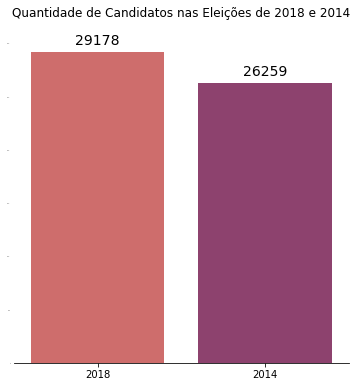

In [ ]:
# Geração do gráfico comparativo da quantidade de candidatos
fig, ax = plt.subplots(figsize=(6,6))
splot = sns.countplot(x='ANO_ELEICAO', order=dfComparado['ANO_ELEICAO'].value_counts().index, data=dfComparado, palette='flare')


plt.title('Quantidade de Candidatos nas Eleições de 2018 e 2014',fontsize=12, pad=20) # Título do gráfico
sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=14, padding=5) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas
plt.ylabel('')
plt.xlabel('')

--
### Sobre Candidatas Mulheres

In [ ]:
# Definição dos dados
candMulheresPartido14 = can14[can14.DS_GENERO=='FEMININO'].groupby('SG_PARTIDO')['DS_GENERO'].count().sort_values(ascending=False).head(10)
candMulheresPartido18 = candidatos[candidatos.DS_GENERO=='FEMININO'].groupby('SG_PARTIDO')['DS_GENERO'].count().sort_values(ascending=False).head(10)

candMulheresCargo14 = can14[can14.DS_GENERO=='FEMININO'].groupby('DS_CARGO')['DS_GENERO'].count().sort_values(ascending=False)
candMulheresCargo18 = candidatos[candidatos.DS_GENERO=='FEMININO'].groupby('DS_CARGO')['DS_GENERO'].count().sort_values(ascending=False)

--
#### Candidatas mulheres por Partido Político

In [ ]:
# Partidos com maior quantidade de candidatas mulheres em 2014
candMulheresPartido14

SG_PARTIDO
PT          428
PMDB        421
PSB         407
PSOL        371
PSDB        365
PV          358
PATRIOTA    319
PRP         318
PDT         316
PHS         307
Name: DS_GENERO, dtype: int64

In [ ]:
# Partidos com maior quantidade de candidatas mulheres em 2018
candMulheresPartido18

SG_PARTIDO
PSL         467
PSOL        458
PT          446
MDB         382
PATRIOTA    371
PROS        334
AVANTE      331
PRTB        330
PSDB        318
PHS         309
Name: DS_GENERO, dtype: int64

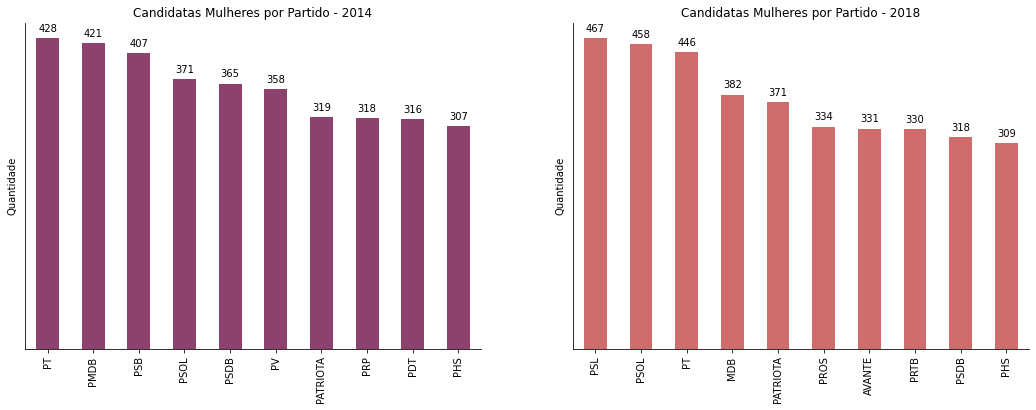

In [ ]:
# Gráficos de Candidatas Mulheres por Partido Político em 2014 e 2018

# Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Dados
ax1 = candMulheresPartido14.plot(ax=ax1, kind='bar', color='#8d426e')
ax2 = candMulheresPartido18.plot(ax=ax2, kind='bar', color='#ce6d6c')

# Títulos e legendas
ax1.title.set_text('Candidatas Mulheres por Partido - 2014')
ax2.title.set_text('Candidatas Mulheres por Partido - 2018')
ax1.set_ylabel('Quantidade')
ax2.set_ylabel('Quantidade')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_yticks([])
ax2.set_yticks([])
ax1.bar_label(ax1.containers[0], padding=5)
ax2.bar_label(ax2.containers[0], padding=5)

sns.despine(left=False) # retirada da moldura

--
#### Candidatas mulheres por Cargo Político

In [ ]:
# Distribuição de mulheres por Cargo Político desejado - 2014
candMulheresCargo14

DS_CARGO
DEPUTADO ESTADUAL     5344
DEPUTADO FEDERAL      2270
DEPUTADO DISTRITAL     316
VICE-GOVERNADOR         57
1º SUPLENTE             43
2º SUPLENTE             41
SENADOR                 35
GOVERNADOR              24
VICE-PRESIDENTE          4
PRESIDENTE               3
Name: DS_GENERO, dtype: int64

In [ ]:
# Distribuição de mulheres por Cargo Político desejado - 2018
candMulheresCargo18

DS_CARGO
DEPUTADO ESTADUAL     5744
DEPUTADO FEDERAL      2767
DEPUTADO DISTRITAL     309
2º SUPLENTE            121
1º SUPLENTE             95
VICE-GOVERNADOR         82
SENADOR                 64
GOVERNADOR              31
VICE-PRESIDENTE          6
PRESIDENTE               2
Name: DS_GENERO, dtype: int64

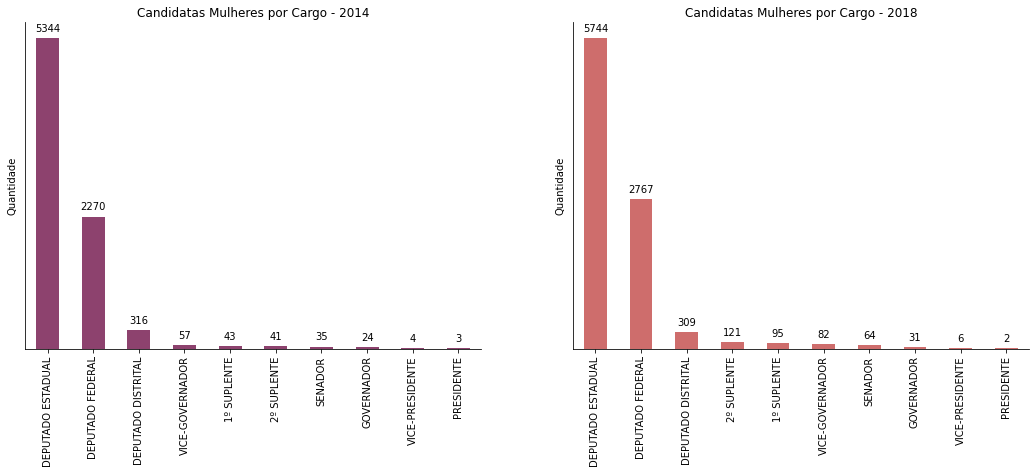

In [ ]:
# Gráficos de Candidatas Mulheres por Cargo Político em 2014 e 2018

# Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Dados
ax1 = candMulheresCargo14.plot(ax=ax1, kind='bar', color='#8d426e')
ax2 = candMulheresCargo18.plot(ax=ax2, kind='bar', color='#ce6d6c')

# Títulos e legendas
ax1.title.set_text('Candidatas Mulheres por Cargo - 2014')
ax2.title.set_text('Candidatas Mulheres por Cargo - 2018')
ax1.set_ylabel('Quantidade')
ax2.set_ylabel('Quantidade')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_yticks([])
ax2.set_yticks([])
ax1.bar_label(ax1.containers[0], padding=5)
ax2.bar_label(ax2.containers[0], padding=5)

sns.despine(left=False) # retirada da moldura

--
### Sobre Candidatos Negros

In [ ]:
# Definição dos dados
candNegros14 = can14[can14.DS_COR_RACA=='PRETA'].groupby('SG_PARTIDO')['DS_COR_RACA'].count().sort_values(ascending=False).head(10)
candNegros18 = candidatos[candidatos.DS_COR_RACA=='PRETA'].groupby('SG_PARTIDO')['DS_COR_RACA'].count().sort_values(ascending=False).head(10)

In [ ]:
# Quantidade de candidatos negros - 2014
candNegros14

SG_PARTIDO
PT          224
PSOL        218
PC do B     113
PHS         110
PSB         108
PSTU        100
PSL          91
PV           89
PATRIOTA     87
PDT          85
Name: DS_COR_RACA, dtype: int64

In [ ]:
# Quantidade de candidatos negros - 2018
candNegros18

SG_PARTIDO
PSOL        306
PT          280
PC do B     188
REDE        124
PATRIOTA    119
PRP         116
PDT         113
PROS        112
PTC         106
PSB         105
Name: DS_COR_RACA, dtype: int64

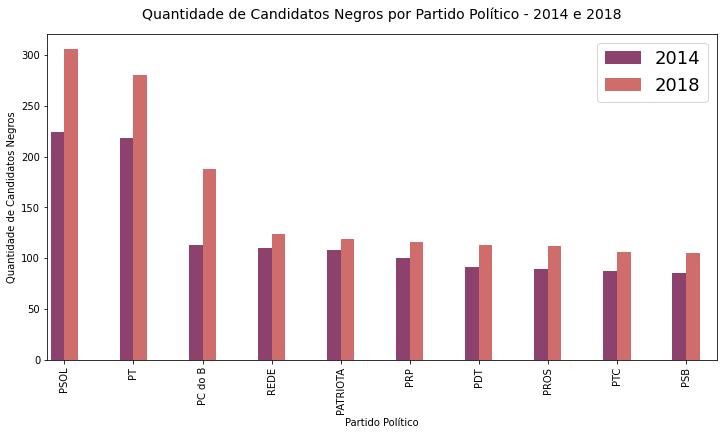

In [ ]:
# Gráfico comparativo Candidatos Negros por Partido em 2014 e 2018

## Definições
fig = plt.figure(figsize=(12,6)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
width = 0.2

## Plotagem
candNegros14.plot(kind='bar', color='#8d426e',  ax=ax, width=width, position=1, label='2014')
candNegros18.plot(kind='bar', color='#ce6d6c', ax=ax, width=width, position=0, label='2018')

# Legendas
ax.set_ylabel('Quantidade de Candidatos Negros') # Eixo Y
ax.set_xlabel('Partido Político') # Eixo X
plt.title("Quantidade de Candidatos Negros por Partido Político - 2014 e 2018", fontsize=14, pad=15)
plt.legend(fontsize=18)

    Partidos de esquerda, como PT, PSOL e PCdoB possuem o maior número de candidatos negros nas duas Eleições Gerais.

--
### Sobre Candidatos com Nome Social

In [ ]:
# Definição dos dados
nomeSocial14 = can14[can14.NM_SOCIAL_CANDIDATO != '#NULO#'].groupby('SG_UF')['NM_SOCIAL_CANDIDATO'].count()
nomeSocial18 = candidatos[candidatos.NM_SOCIAL_CANDIDATO != '#NULO#'].groupby('SG_UF')['NM_SOCIAL_CANDIDATO'].count().sort_values(ascending=False).sum()

In [ ]:
# Quantidade de candidatos com nome social - 2014
nomeSocial14

Series([], Name: NM_SOCIAL_CANDIDATO, dtype: int64)

    Em 2014, nenhum candidato nas Eleições Gerais usou nome social.

In [ ]:
# Quantidade de candidatos com nome social - 2018
nomeSocial18

29

    Em 2018, 29 candidatos nas Eleições Gerais usaram nome social, o que representa apenas 0.09% do total.

Text(0.5, 0, '')

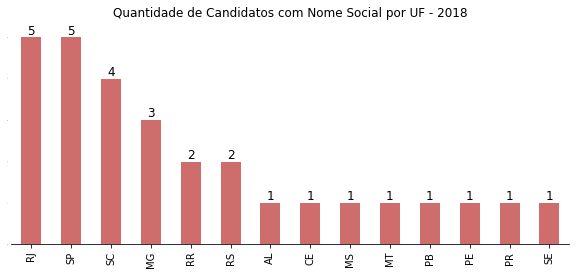

In [ ]:
# Gráfico - Candidatos com nome social por UF
fig, ax = plt.subplots(figsize=(10,4))
splot = candidatos[candidatos.NM_SOCIAL_CANDIDATO != '#NULO#'].groupby('SG_UF')['NM_SOCIAL_CANDIDATO'].count().sort_values(ascending=False).plot(kind='bar', stacked=True, color='#ce6d6c')


plt.title('Quantidade de Candidatos com Nome Social por UF - 2018',fontsize=12, pad=10) # Título do gráfico
sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas
plt.ylabel('')
plt.xlabel('')

In [ ]:
# Cargos políticos disputados pelos candidados com nome social
candidatos[candidatos.NM_SOCIAL_CANDIDATO != '#NULO#'].groupby('DS_CARGO')['NM_SOCIAL_CANDIDATO'].count().sort_values(ascending=False)

DS_CARGO
DEPUTADO ESTADUAL    18
DEPUTADO FEDERAL     10
SENADOR               1
Name: NM_SOCIAL_CANDIDATO, dtype: int64

--
### Sobre Candidaturas Indeferidas

In [ ]:
for val in candidatos['DS_SITUACAO_CANDIDATO_PLEITO'].unique():
    print(val)

DEFERIDO
INDEFERIDO COM RECURSO
#NULO#
DEFERIDO COM RECURSO
RENÚNCIA
INDEFERIDO
PENDENTE DE JULGAMENTO
PEDIDO NÃO CONHECIDO
AGUARDANDO JULGAMENTO
FALECIDO


In [ ]:
# Dados de Indeferidos
candIndeferidos14 = can14[can14.DS_SITUACAO_CANDIDATO_PLEITO=='INDEFERIDO'].groupby('SG_PARTIDO')['DS_SITUACAO_CANDIDATO_PLEITO'].count().sort_values(ascending=False).head(10)
candIndeferidos18 = candidatos[candidatos.DS_SITUACAO_CANDIDATO_PLEITO=='INDEFERIDO'].groupby('SG_PARTIDO')['DS_SITUACAO_CANDIDATO_PLEITO'].count().sort_values(ascending=False).head(10)

In [ ]:
# Quantidade de candidatos indeferidos por partido político - 2014
candIndeferidos14

SG_PARTIDO
PV         15
PSDC       12
PCB        11
PPS        11
PRTB       10
PHS        10
PSOL       10
PDT         9
PT do B     9
PRP         8
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

In [ ]:
# Quantidade de candidatos indeferidos por partido político - 2018
candIndeferidos18

SG_PARTIDO
PRTB        45
PSL         39
PATRIOTA    36
PT          32
PPS         30
PRP         28
PDT         26
PTC         24
DC          23
PMN         21
Name: DS_SITUACAO_CANDIDATO_PLEITO, dtype: int64

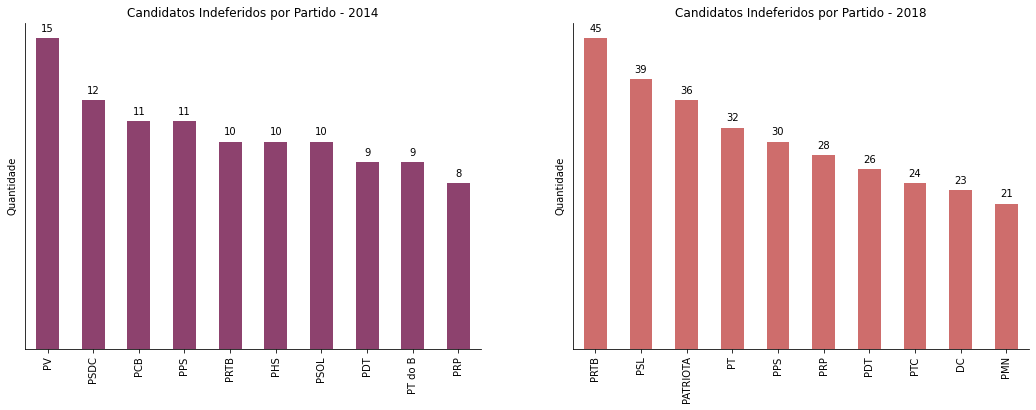

In [ ]:
# Gráficos de Candidatos Indeferidos por Partido em 2014 e 2018

# Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Dados
ax1 = candIndeferidos14.plot(ax=ax1, kind='bar', color='#8d426e')
ax2 = candIndeferidos18.plot(ax=ax2, kind='bar', color='#ce6d6c')

# Títulos e legendas
ax1.title.set_text('Candidatos Indeferidos por Partido - 2014')
ax2.title.set_text('Candidatos Indeferidos por Partido - 2018')
ax1.set_ylabel('Quantidade')
ax2.set_ylabel('Quantidade')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_yticks([])
ax2.set_yticks([])
ax1.bar_label(ax1.containers[0], padding=5)
ax2.bar_label(ax2.containers[0], padding=5)

sns.despine(left=False) # retirada da moldura

--
### Sobre candidaturas inaptas

In [ ]:
# Definição dos dados
candInaptos14 = can14[can14.DS_SITUACAO_CANDIDATURA=='INAPTO'].groupby('SG_PARTIDO')['DS_SITUACAO_CANDIDATO_PLEITO'].count().sort_values(ascending=False).head(10)
candInaptos18 = candidatos[candidatos.DS_SITUACAO_CANDIDATURA=='INAPTO'].groupby('SG_PARTIDO')['DS_SITUACAO_CANDIDATO_PLEITO'].count().sort_values(ascending=False).head(10)

In [ ]:
# Candidatos inaptos em 2014
candInaptos14.sum()

1919

In [ ]:
# Candidatos inaptos em 2018
candInaptos18.sum()

1403

    Redução de 26.88% no número de candidaturas consideradas inaptas pelo TSE. 

--
### Sobre candidatos de diferentes nacionalidades

In [ ]:
for val in candidatos['DS_NACIONALIDADE'].unique():
    print(val)

BRASILEIRA NATA
BRASILEIRA (NATURALIZADA)
ESTRANGEIRO
PORTUGUESA COM IGUALDADE DE DIREITOS


In [ ]:
# Quantidade total de candidatos Estrangeiros - 2014
quantCandEstrangeiros14 = can14[can14.DS_NACIONALIDADE != 'BRASILEIRA NATA'].value_counts().sum()

quantCandEstrangeiros14

120

In [ ]:
# Quantidade total de candidatos Estrangeiros - 2018
quantCandEstrangeiros18 = candidatos[candidatos.DS_NACIONALIDADE != 'BRASILEIRA NATA'].value_counts().sum()

quantCandEstrangeiros18

146

    Aumento de 21.66% no número de candidatos estrangeiros concorrendo a um cargo político no Brasil.

--
### Sobre candidatos que faleceram durante o processo eleitoral

In [ ]:
# Descrição dos candidatos que faleceram durante o pleito de 2014
can14[can14.DS_SITUACAO_CANDIDATO_PLEITO=='FALECIDO']

,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
11619,2014,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais 2014,FEDERAL,BA,BA,BAHIA,DEPUTADO ESTADUAL,ONDUMAR FERREIRA BORGES,ONDUMAR MARABA,#NULO#,INAPTO,FALECIDO,COLIGAÇÃO,PSC,PARTIDO SOCIAL CRISTÃO,UNIDOS PARA UMA BAHIA MELHOR,DEM / PMDB / PSDB / PTN / SD / PROS / PRB / PSC,BRASILEIRA NATA,GO,EDEIVA,12/05/1965,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,VEREADOR,NÃO ELEITO,N,S,FALECIDO,DEFERIDO


In [ ]:
# Descrição dos candidatos que faleceram durante o pleito de 2018
candidatos[candidatos.DS_SITUACAO_CANDIDATO_PLEITO=='FALECIDO']


,ANO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,DS_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,DS_CARGO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,DS_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_URNA
21630,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,RS,RS,RIO GRANDE DO SUL,DEPUTADO ESTADUAL,ELISA MARA MACHADO RODRIGUES,MARA RODRIGUES,#NULO#,INAPTO,FALECIDO,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PARTIDO ISOLADO,MDB,BRASILEIRA NATA,RS,PORTO ALEGRE,1956-07-06,62,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,DONA DE CASA,NÃO ELEITO,N,N,FALECIDO,DEFERIDO
24576,2018,ELEIÇÃO ORDINÁRIA,1,Eleições Gerais Estaduais 2018,ESTADUAL,BA,BA,BAHIA,DEPUTADO FEDERAL,ALCIDES DA SILVA ARAUJO,ALCIDÃO,#NULO#,INAPTO,FALECIDO,COLIGAÇÃO,DEM,DEMOCRATAS,UNIDOS PARA MUDAR A BAHIA,DEM / PRB / PV,BRASILEIRA NATA,BA,JAGUARARI,1955-01-25,63,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),PARDA,COMERCIANTE,NÃO ELEITO,N,N,FALECIDO,DEFERIDO


---